<a href="https://colab.research.google.com/github/alizehadeel/AI-ML-Notebook/blob/main/FeatureEngineering2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import seaborn as sns
data = sns.load_dataset("titanic")
data.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Q1: Load the dataset into a Pandas DataFrame.

Q2: Display the first 5 rows and check the shape of the dataset.

Q3: Print the column names and their data types.

In [89]:
import pandas as pd
df=pd.DataFrame(data)
#df.head(5)
#df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Q4: Get summary statistics (describe()), including categorical columns.

Q5: Find the number of unique values in each column.

Q6: Visualize the distribution of numerical features (histograms).

Q7: Plot the survival rate with respect to gender and class.


In [90]:
df.describe()
df.describe(include='object')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [91]:
print(df.nunique())

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64


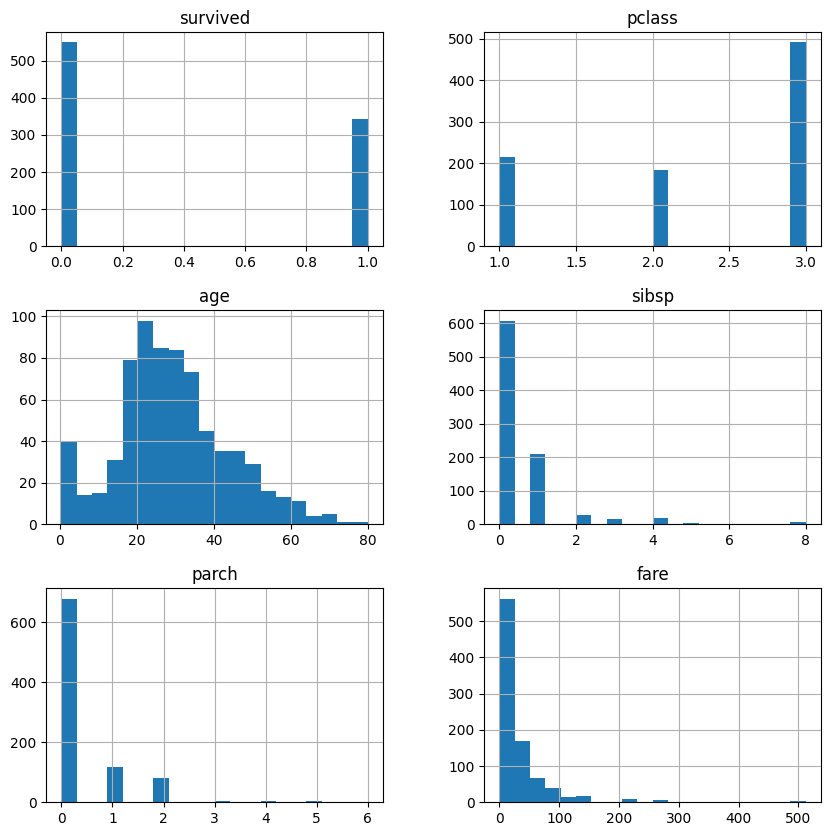

In [92]:
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(10, 10))
plt.show()


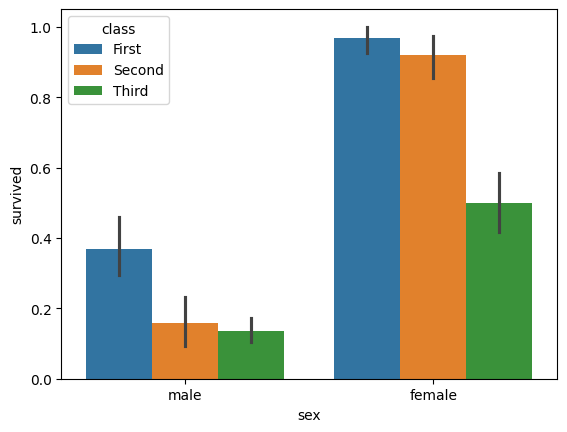

In [93]:
#Plot the survival rate with respect to gender and class.
sns.barplot(data=df, x="sex", y="survived", hue="class")# x axis col, y axis col, hue: group by col
plt.show()

Q9: Count missing values for each column.

Q10: Drop columns with more than 40% missing values.

Q11: Fill missing age with median age.

Q12: Fill missing embarked with mode.

In [94]:
missing_values=df.isnull().sum()
missing_values
df.drop('deck', axis=1, inplace=True)
df.age=df.age.fillna(df.age.median())
df.embarked=df.embarked.fillna(df.embarked.mode()[0])
df.embark_town=df.embark_town.fillna(df.embark_town.mode()[0])

Q13: Convert sex into binary numeric format (0 = male, 1 = female).

Q14: Perform one-hot encoding for embarked.

Q15: Drop one dummy column to avoid dummy variable trap.

In [95]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.sex=le.fit_transform(df.sex)

embarked_encoded=pd.get_dummies(df.embarked, prefix='embarked')
df.drop('embarked', axis=1, inplace=True)
df=pd.concat([df, embarked_encoded], axis=1)

Z-score Method

Q16: Compute Z-scores for numerical features (age, fare).

Q17: Remove rows where Z-score > 3.

IQR Method

Q18: Calculate Q1, Q3, and IQR for fare.

Q19: Remove rows outside 1.5 × IQR range.

In [96]:
import numpy as np
mask=np.ones(len(df), dtype=bool)#this is one column
for col in df.columns:
  if df[col].dtype=='int64' or df[col].dtype=='float64':
    mean=df[col].mean()
    std=df[col].std()
    zscore=(df[col]-mean)/std
    zscore=np.abs(zscore)
    mask=mask & (zscore<=3)#every iteration, this column is updated
df=df[mask]#every row of df is compared with the corresponding element of the mask

Q1=df.fare.quantile(0.25)
Q3=df.fare.quantile(0.75)
IQR=Q3-Q1
UB=Q3+1.5*IQR
LB=Q1-1.5*IQR
mask=(df.fare>=LB) & (df.fare<=UB)#use and for single comparisons, & for numpy arrays
df=df[mask]

Q20: Compute correlation matrix and visualize using a heatmap.

Q21: Drop features with correlation > 0.85 (highly correlated).

Q22: Identify which features are most strongly correlated with survival.

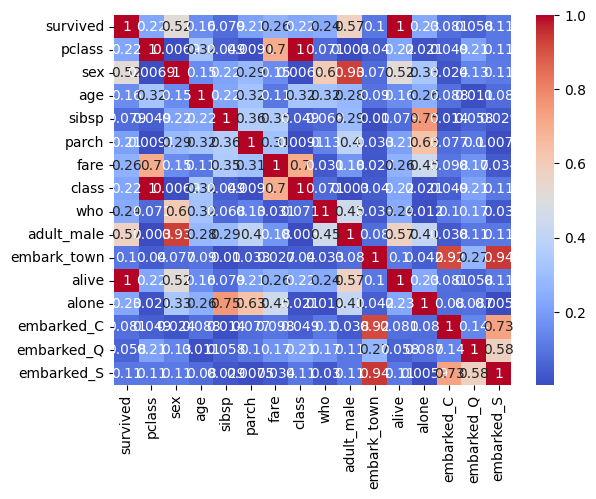

alive         1.000000
adult_male    0.568401
sex           0.520912
fare          0.257225
Name: survived, dtype: float64


In [103]:
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = le.fit_transform(df[col])

df_corr=df.corr().abs()
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.show()

to_drop=[]
for col in df_corr.columns:
  for row in df_corr.index:
    if row != col and df_corr.loc[row, col]>0.85:
      to_drop.append(col)
      break

to_drop=list(set(to_drop))
df.drop(to_drop, axis=1, inplace=True)

corr_survival=df_corr['survived'].sort_values(ascending=False)
print(corr_survival[1:5])

In [104]:
print(to_drop)
df.head()
#df.info()

['sex', 'alive', 'embarked_C', 'embarked_S', 'adult_male', 'embark_town', 'pclass', 'class', 'survived']


,age,sibsp,parch,fare,who,alone,embarked_Q
0,22.0,1,0,7.2500,1,False,False
2,26.0,0,0,7.9250,2,True,False
3,35.0,1,0,53.1000,2,False,False
4,35.0,0,0,8.0500,1,True,False
5,28.0,0,0,8.4583,1,True,True


Q23: Standardize the features using StandardScaler.

Q24: Perform PCA to reduce features to 2 principal components.

Q25: Plot the data in 2D using the principal components, color by survival.

Q26: Calculate explained variance ratio for each component.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scalar=StandardScaler()
df_scaled=scalar.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled, columns=df_scaled.columns)
pca=PCA(n_components=2)
df_pca=pca.fit_transform(df_scaled)
df_pca=pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['survived']=df.survived
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='survived')
plt.show()